In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

In [2]:
df = pd.read_csv('Clean_Healthcare_df_transposed_v7.csv', index_col=0)

In [3]:
df.head(30)

,Date,Total Expenditure,Out of pocket,Health Insurance,Private Health Insurance,Medicare,Medicaid (Title XIX)
1,1995-01,1021635,144816,681480,325339,184393,144862
2,1996-01,1074409,150354,722124,343686,198750,152170
3,1997-01,1135224,161370,758320,359553,210376,160849
4,1998-01,1201451,176812,792102,384738,209420,169011
5,1999-01,1277700,187575,845592,417078,213173,183455
6,2000-01,1369125,198886,918957,457978,224829,200345
7,2001-01,1486158,206200,1014390,501939,247686,224092
8,2002-01,1628624,219273,1121517,560963,265381,248050
9,2003-01,1767567,235635,1221745,615138,282668,268903
10,2004-01,1895724,248494,1320086,658268,311122,290679


In [4]:
df.Date.head().values

array(['1995-01', '1996-01', '1997-01', '1998-01', '1999-01'], dtype=object)

In [5]:
pd.to_datetime(df.Date)

1    1995-01-01
2    1996-01-01
3    1997-01-01
4    1998-01-01
5    1999-01-01
6    2000-01-01
7    2001-01-01
8    2002-01-01
9    2003-01-01
10   2004-01-01
11   2005-01-01
12   2006-01-01
13   2007-01-01
14   2008-01-01
15   2009-01-01
16   2010-01-01
17   2011-01-01
18   2012-01-01
19   2013-01-01
20   2014-01-01
21   2015-01-01
22   2016-01-01
Name: Date, dtype: datetime64[ns]

In [6]:
df.shape

(22, 7)

In [7]:
df.columns.values

array(['Date', 'Total Expenditure', '     Out of pocket',
       '     Health Insurance', '          Private Health Insurance',
       '          Medicare', '          Medicaid (Title XIX)'], dtype=object)

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

df['Year'] = df.index.year
df['Month'] = df.index.month

In [9]:
df.head()

,Total Expenditure,Out of pocket,Health Insurance,Private Health Insurance,Medicare,Medicaid (Title XIX),Year,Month
Date,,,,,,,,
1995-01-01,1021635,144816,681480,325339,184393,144862,1995,1
1996-01-01,1074409,150354,722124,343686,198750,152170,1996,1
1997-01-01,1135224,161370,758320,359553,210376,160849,1997,1
1998-01-01,1201451,176812,792102,384738,209420,169011,1998,1
1999-01-01,1277700,187575,845592,417078,213173,183455,1999,1


In [10]:
df.columns.values

array(['Total Expenditure', '     Out of pocket', '     Health Insurance',
       '          Private Health Insurance', '          Medicare',
       '          Medicaid (Title XIX)', 'Year', 'Month'], dtype=object)

In [11]:
df.index

DatetimeIndex(['1995-01-01', '1996-01-01', '1997-01-01', '1998-01-01',
               '1999-01-01', '2000-01-01', '2001-01-01', '2002-01-01',
               '2003-01-01', '2004-01-01', '2005-01-01', '2006-01-01',
               '2007-01-01', '2008-01-01', '2009-01-01', '2010-01-01',
               '2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01',
               '2015-01-01', '2016-01-01'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [12]:
df.columns = [x.strip() for x in df.columns.values]

In [13]:
df.columns

Index(['Total Expenditure', 'Out of pocket', 'Health Insurance',
       'Private Health Insurance', 'Medicare', 'Medicaid (Title XIX)', 'Year',
       'Month'],
      dtype='object')

## VISUALIZING OVERALL U.S. HEALTH EXPENDITURE USING SELECT VARIABLES

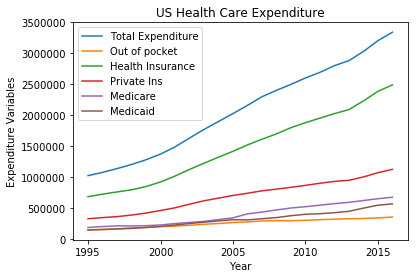

In [14]:
plt.plot(df["Year"], df["Total Expenditure"], label="Total Expenditure")
plt.plot(df["Year"], df["Out of pocket"], label="Out of pocket")
plt.plot(df["Year"], df["Health Insurance"], label="Health Insurance")
plt.plot(df["Year"], df["Private Health Insurance"], label="Private Ins")
plt.plot(df["Year"], df["Medicare"], label="Medicare")
plt.plot(df["Year"], df["Medicaid (Title XIX)"], label="Medicaid")
plt.xlabel("Year")
plt.ylabel("Expenditure Variables")
plt.title("US Health Care Expenditure")
plt.legend()
plt.show()

## VISUALIZING IMPACT OF MEDICARE ON HEALTHCARE EXPENDITURE

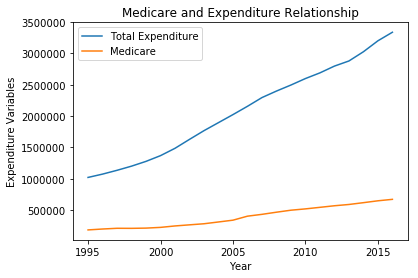

In [15]:
plt.plot(df["Year"], df["Total Expenditure"], label="Total Expenditure")
plt.plot(df["Year"], df["Medicare"], label="Medicare")
plt.xlabel("Year")
plt.ylabel("Expenditure Variables")
plt.title("Medicare and Expenditure Relationship")
plt.legend()
plt.show()

## VISUALIZING IMPACT OF MEDICAID ON HEALTHCARE EXPENDITURE

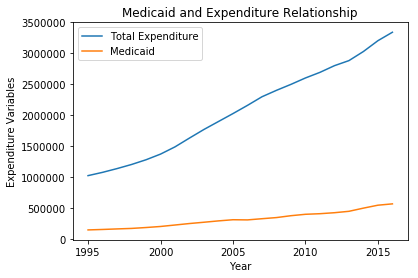

In [16]:
plt.plot(df["Year"], df["Total Expenditure"], label="Total Expenditure")
plt.plot(df["Year"], df["Medicaid (Title XIX)"], label="Medicaid")
plt.xlabel("Year")
plt.ylabel("Expenditure Variables")
plt.title("Medicaid and Expenditure Relationship")
plt.legend()
plt.show()

In [40]:
df[['Total Expenditure']].resample('A').mean().sort_values(by='Total Expenditure')

,Total Expenditure
Date,
1995-12-31,1021635
1996-12-31,1074409
1997-12-31,1135224
1998-12-31,1201451
1999-12-31,1277700
2000-12-31,1369125
2001-12-31,1486158
2002-12-31,1628624
2003-12-31,1767567


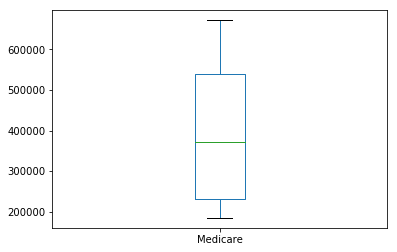

In [17]:
df.Medicare.plot(kind='box')

## CHECKING TOTAL EXPENDITURE CORRELATION IN THE HEALTHCARE SYSTEM

In [28]:
df['Total Expenditure'].resample('A').mean().autocorr(lag=1)

0.99925761014641656

## PLOTTING THE ROLLING MEAN FOR THE ANNUAL HEALTHCARE EXPENDITURE

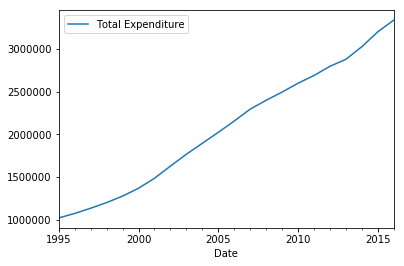

In [29]:
df[['Total Expenditure']].rolling(window=1).mean().plot()

## COMPUTING/PLOTTING 1, 2, 5, AND 10 YR AUTOCORRELATIONS FOR ALL EXPENDITURE

In [30]:
print('Autocorrelation 1: ', df['Total Expenditure'].autocorr(1))
print('Autocorrelation 2: ', df['Total Expenditure'].autocorr(2))
print('Autocorrelation 5: ', df['Total Expenditure'].autocorr(5))
print('Autocorrelation 10: ', df['Total Expenditure'].autocorr(10))

Autocorrelation 1:  0.999257610146
Autocorrelation 2:  0.997324827822
Autocorrelation 5:  0.988860595717
Autocorrelation 10:  0.988289784789


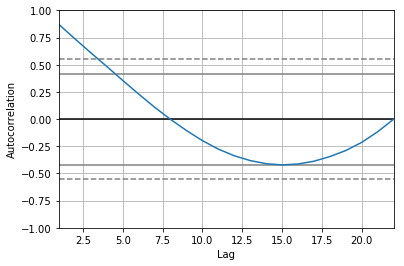

In [31]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['Total Expenditure'])

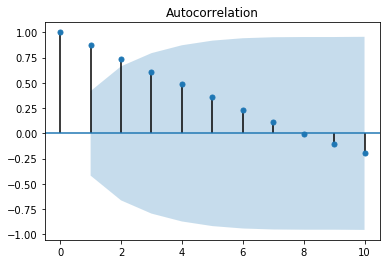

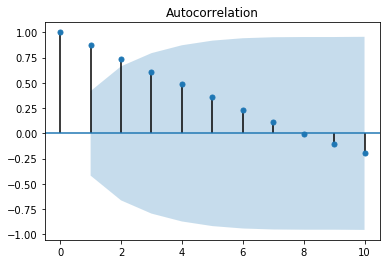

In [32]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df['Total Expenditure'], lags=10)

## SPLIT ANNUAL EXPENDITURE INTO TRAINING AND TEST SET USING - 75% TRAINING

In [35]:
n = len(df['Total Expenditure'])

train = df['Total Expenditure'][:int(.75*n)]
test = df['Total Expenditure'][int(.75*n):]

In [36]:
type(train)

pandas.core.series.Series

## AR(1) MODEL ON TRAINING DATA TO COMPUTE MEAN ABSOLUTE ERROR OF PREDICTIN

In [37]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

In [42]:
model = sm.tsa.ARIMA(train, (1, 0, 0)).fit()

predictions = model.predict(
    '2013-01-01',
    '2016-01-01',
    dynamic=True, 
)

print("Mean absolute error: ", mean_absolute_error(test, predictions))
model.summary()

TypeError: Cannot cast ufunc subtract output from dtype('float64') to dtype('int64') with casting rule 'same_kind'